# **Iris Analysis Project**

# Data Preprocessing



In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Load the Iris dataset.**

In [ ]:
df = pd.read_csv("/content/iris.data")
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
df.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df = df.rename(columns={'5.1': 'sepal_length'})
df = df.rename(columns={'3.5': 'sepal_width'})
df = df.rename(columns={'1.4': 'petal_length'})
df = df.rename(columns={'0.2': 'petal_width'})
df = df.rename(columns={'Iris-setosa': 'iris_plant'})

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'iris_plant'],
      dtype='object')

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Data exploration and visualization.**

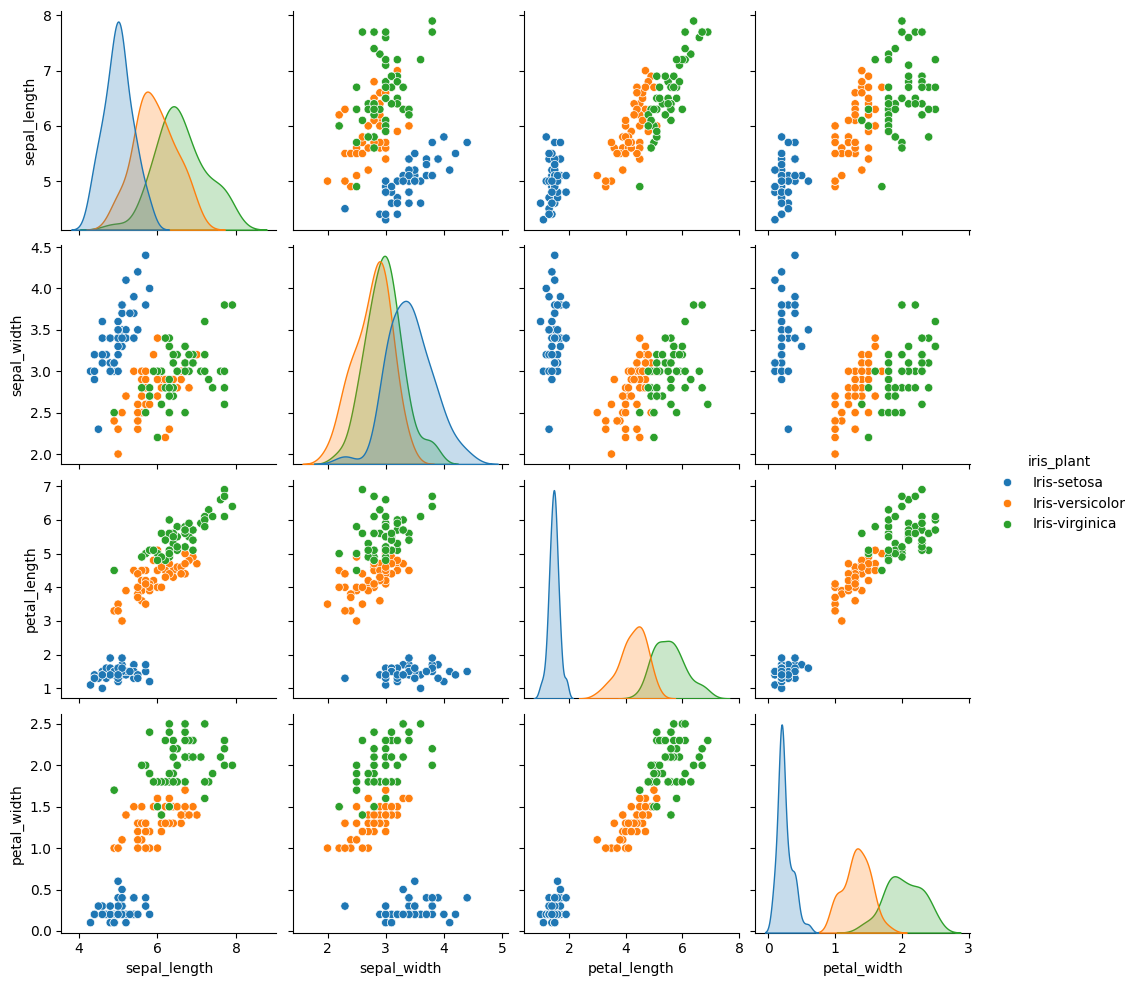

In [ ]:
import seaborn as sns
sns.pairplot(df, hue='iris_plant')

**Check for missing values**

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
iris_plant      0
dtype: int64

**Shuffle data for Supervised Learning**

In [ ]:
shuffled_df = df.sample(frac=1, random_state=42)

In [ ]:
df=shuffled_df.reset_index(drop=True)

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,iris_plant
0,6.4,2.9,4.3,1.3,Iris-versicolor
1,5.1,3.8,1.5,0.3,Iris-setosa
2,7.7,2.6,6.9,2.3,Iris-virginica
3,5.7,2.6,3.5,1.0,Iris-versicolor
4,6.7,3.0,5.0,1.7,Iris-versicolor
...,...,...,...,...,...
144,6.3,2.5,4.9,1.5,Iris-versicolor
145,7.3,2.9,6.3,1.8,Iris-virginica
146,5.7,4.4,1.5,0.4,Iris-setosa
147,5.0,2.3,3.3,1.0,Iris-versicolor


**Split the dataset into features and target variables.**

In [ ]:
X =df[['sepal_length','sepal_width','petal_length','petal_width']]
y =df['iris_plant']

In [ ]:
X.shape

(149, 4)

In [ ]:
y.shape

(149,)

In [ ]:
import pandas as pd

flower_types = df['iris_plant'].unique()

for iris_plant in flower_types:
    filtered_data = df[df['iris_plant'] == iris_plant]

    print("Flower Type: {}".format(iris_plant))
    print("")

    for column in filtered_data.columns:
        if column != 'iris_plant':
            column_data = filtered_data[column]
            max_value = column_data.max()
            min_value = column_data.min()

            print("Column: {}".format(column))
            print("Highest value: {}".format(max_value))
            print("Lowest value: {}".format(min_value))
            print("")

    print("")

Flower Type: Iris-versicolor

Column: sepal_length
Highest value: 7.0
Lowest value: 4.9

Column: sepal_width
Highest value: 3.4
Lowest value: 2.0

Column: petal_length
Highest value: 5.1
Lowest value: 3.0

Column: petal_width
Highest value: 1.8
Lowest value: 1.0


Flower Type: Iris-setosa

Column: sepal_length
Highest value: 5.8
Lowest value: 4.3

Column: sepal_width
Highest value: 4.4
Lowest value: 2.3

Column: petal_length
Highest value: 1.9
Lowest value: 1.0

Column: petal_width
Highest value: 0.6
Lowest value: 0.1


Flower Type: Iris-virginica

Column: sepal_length
Highest value: 7.9
Lowest value: 4.9

Column: sepal_width
Highest value: 3.8
Lowest value: 2.2

Column: petal_length
Highest value: 6.9
Lowest value: 4.5

Column: petal_width
Highest value: 2.5
Lowest value: 1.4




# 2. Unsupervised Learning:

**Apply K-means**

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
kmeans.labels_

array([0, 1, 2, 0, 2, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 2, 0, 1, 0, 0,
       0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 1, 0, 2, 2, 1,
       2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 1, 0, 2], dtype=int32)

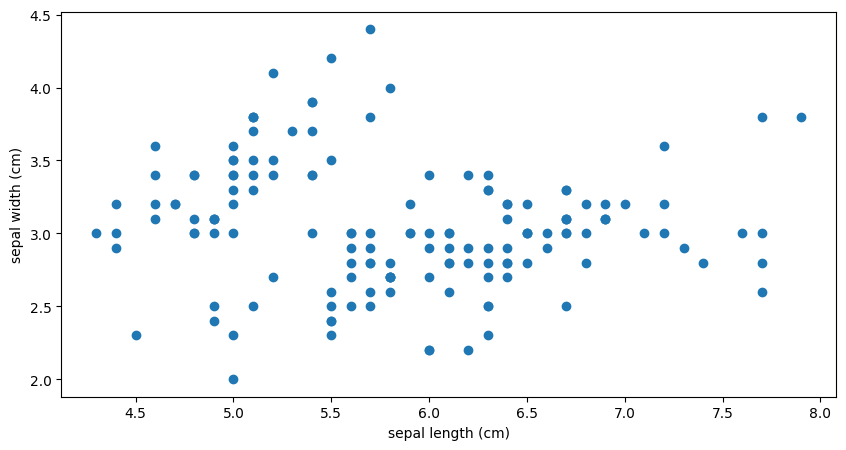

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(x=X.iloc[:, 0], y=X.iloc[:, 1])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)');

**Visualize the clusters.**

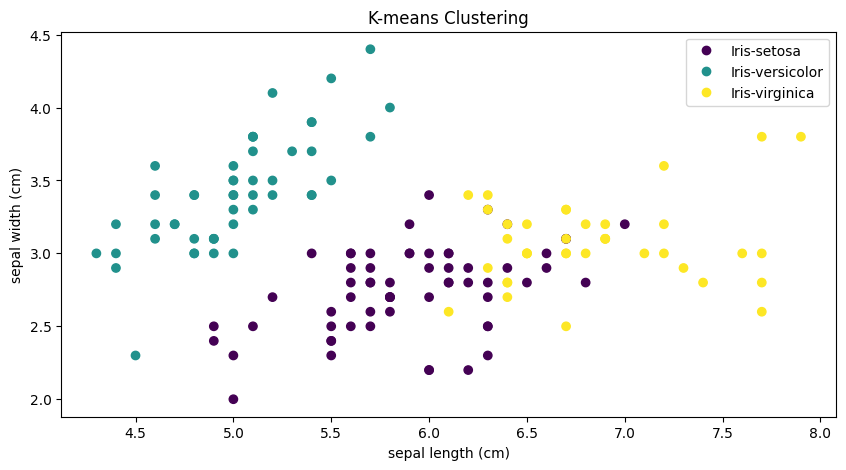

In [ ]:
plt.figure(figsize=(10,5))
scatter=plt.scatter(x=X.iloc[:, 0], y=X.iloc[:, 1],c= kmeans.labels_)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('K-means Clustering')
plt.legend(handles=scatter.legend_elements()[0], labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']);

In [ ]:
kmeans.predict([[6.0,2.5,1.6,1.5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

**Detect outliers**

In [ ]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN(eps=0.3, min_samples=5)
dbs=dbs.fit(X)

In [ ]:
dbs.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,
       -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,
        0, -1,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
        1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1,
       -1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  2,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2])

In [ ]:
set(dbs.labels_)

{-1, 0, 1, 2}

In [ ]:
n_clusters=len(set(dbs.labels_))-(1 if -1 in dbs.labels_ else 0)
outlier=list(dbs.labels_).count(-1)
print("CLUSTERS NUMBER: %d" % n_clusters)
print("OUTLIRE: %d" % outlier)

CLUSTERS NUMBER: 3
OUTLIRE: 96


**Evaluate the clustering results.**

In [ ]:
from sklearn.metrics import silhouette_score
Kmeans=KMeans(n_clusters=3)
Kmeans.fit(X)
silhouette_score(X,Kmeans.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5501981391949842

# **3. Supervised model:**

**Split the dataset into training and testing sets.**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Build a baseline model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

**Evaluate the baseline model's performance.**

In [ ]:
from sklearn.metrics import accuracy_score

predictions = dt.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}".format(accuracy))

# **4. Model Comparison**

**3 machine learning algorithms**

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

svm = SVC()
svm.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)


GradientBoostingClassifier()

**Implement each algorithm and evaluate its performance using cross-validation**

In [ ]:
svm_scores = cross_validate(svm, X_train, y_train, cv=5)
print("Support Vector Machines Accuracy for each fold:")
for fold in range(1, 6):
    print("Fold {}: {:.2f}".format(fold, svm_scores['test_score'][fold-1]))
svm_accuracy = svm_scores['test_score'].mean()
print("Average Accuracy: {:.2f}".format(svm_accuracy))
print()

rf_scores = cross_validate(rf, X_train, y_train, cv=5)
print("Random Forest Accuracy for each fold:")
for fold in range(1, 6):
    print("Fold {}: {:.2f}".format(fold, rf_scores['test_score'][fold-1]))
rf_accuracy = rf_scores['test_score'].mean()
print("Average Accuracy: {:.2f}".format(rf_accuracy))
print()

gb_scores = cross_validate(gb, X_train, y_train, cv=5 )
print("Gradient Boosting Accuracy for each fold:")
for fold in range(1, 6):
    print("Fold {}: {:.2f}".format(fold, gb_scores['test_score'][fold-1]))
gb_accuracy = gb_scores['test_score'].mean()
print("Average Accuracy: {:.2f}".format(gb_accuracy))
print()

Support Vector Machines Accuracy for each fold:
Fold 1: 0.96
Fold 2: 1.00
Fold 3: 0.92
Fold 4: 1.00
Fold 5: 1.00
Average Accuracy: 0.97

Random Forest Accuracy for each fold:
Fold 1: 0.96
Fold 2: 1.00
Fold 3: 0.92
Fold 4: 0.96
Fold 5: 1.00
Average Accuracy: 0.97

Gradient Boosting Accuracy for each fold:
Fold 1: 0.96
Fold 2: 1.00
Fold 3: 0.92
Fold 4: 0.92
Fold 5: 1.00
Average Accuracy: 0.96



**Compare the performance of algorithms based on evaluation metrics**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_evaluation_metrics(clf_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    print("Evaluation Metrics for", clf_name)
    print("Accuracy: {:.2f}".format(accuracy))
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1-Score: {:.2f}".format(f1))
    print()

svm = SVC()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

svm.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

svm_pred = svm.predict(X_test)
rf_pred = rf.predict(X_test)
gb_pred  = gb.predict(X_test)

print_evaluation_metrics("SVM Classifier", y_test, svm_pred)
print_evaluation_metrics("Random Forest Classifier", y_test, rf_pred)
print_evaluation_metrics("Gradient Boosting Classifier", y_test, gb_pred)

Evaluation Metrics for SVM Classifier
Accuracy: 0.93
Precision: 0.92
Recall: 0.94
F1-Score: 0.92

Evaluation Metrics for Random Forest Classifier
Accuracy: 0.93
Precision: 0.92
Recall: 0.94
F1-Score: 0.92

Evaluation Metrics for Gradient Boosting Classifier
Accuracy: 0.93
Precision: 0.92
Recall: 0.94
F1-Score: 0.92



**Select the best-performing algorithm**

In [ ]:
accuracy_scores = [svm_accuracy, rf_accuracy, gb_accuracy]
best_accuracy = max(accuracy_scores)

if best_accuracy == svm_accuracy:
    best_algorithm = "Support Vector Machines"
elif best_accuracy == rf_accuracy:
    best_algorithm = "Random Forest"
else:
    best_algorithm = "Gradient Boosting"

print("Best performing algorithm based on accuracy:" , best_algorithm)

Best performing algorithm based on accuracy: Support Vector Machines


# **5. Model Tuning and Ensemble**

In [ ]:
from sklearn.model_selection import GridSearchCV

svm = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_svm = grid_search.best_estimator_

**Evaluate the tuned model's performance.**

In [ ]:
svm_predictions = best_svm.predict(X_test)
svm_f1_scoreaccuracy = accuracy_score(y_test, svm_predictions)

print("Accuracy for Tuned SVM Model:")
print("Accuracy: {:.2f}".format(svm_accuracy*100),"%")

Accuracy for Tuned SVM Model:
Accuracy: 93.33 %


**Implement an ensemble of the top-performing algorithms and compare its performance with the tuned model.**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

model1 = RandomForestClassifier(n_estimators=100)
model2 = GradientBoostingClassifier(n_estimators=100)
model3 = KNeighborsClassifier(n_neighbors=3)


top_model = RandomForestClassifier(n_estimators=100)

stacking_model = StackingClassifier(
    estimators=[('rf', model1), ('gb', model2), ('knn', model3)],
    final_estimator=top_model
)

stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)

st_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy ensemble Model:")
print("Accuracy: {:.2f}".format(st_accuracy*100),"%")

Accuracy ensemble Model:
Accuracy: 93.33 %


In [ ]:
if svm_accuracy > st_accuracy:
    print("svm is higher than staking.")
elif svm_accuracy < st_accuracy:
    print("svm is lower than staking.")
else:
    print("svm is equal to staking.")

svm is higher than staking.


# **DONE 🦾**